## Маятник

Пусть математический маятник задан следующим уравнением:
$$
-mgl \sin(\alpha) - k \dot{\alpha} = ml^2 \ddot{\alpha}
$$
У данного ДУ два положения равновесия: $\alpha = \{0, \pm \pi \}$. Линеаризуя систему около заданных положений и добавляя управление, получаем следующие уравнения:
$$
\ddot{\alpha} + \kappa \dot{\alpha} + \omega^2 \alpha = u, \\
\ddot{\alpha} + \kappa \dot{\alpha} - \omega^2 \alpha = u
$$

Задачу о малых колебаниях может быть записана в виде:
$$
\dot{x} = Ax + Bu, \\
y = Cx
$$

Делаем замену $\dot{\alpha} = x_2$, $\alpha = x_1$. Отсюда,
$$
\dot{x_1} = x_2, \\
\dot{x_2} = -2\kappa x_2 - \omega^2 x_1 + u 
$$

Таким образом матрицы $A = $$\begin{pmatrix} 0 & 0 \\ -\omega^2 & -2\kappa \end{pmatrix}$$ $,
$B = $$\begin{pmatrix} 0 \\ 1 \end{pmatrix}$$ $, $C = $$\begin{pmatrix} 1 \\ 0 \end{pmatrix}$$ $, если $y = \alpha$.

Для передаточной функции $G_{ux}$ подействуем на обе части оператором Лапласа. Имеем
$$
(s^2 + 2\kappa s + \omega^2)\mathbf{L}(x(t)) = u, \\
x = G_{ux} u, \\
G_{us} = \frac{1}{s^2 + 2 \kappa s + \omega^2}
$$

Построим АЧХ = $|G_{ux}|$, ФЧХ = $\arg G_{ux}$, ЛАХ, ЛФХ, годограф Михайлова.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import sympy as ss
from scipy.signal import *

## АЧХ, ФЧХ, ЛАХ, ЛФХ --  AFC, PFC, LAC, LFC

In [2]:
def Mikailov_plot(kappa, omega_squared, ax):
    T1, T2, w = ss.symbols('T1 T2 w', real = True)
    z = ss.factor(1 / (-w ** 2 + ss.I * T1 * w + T2))
    print("Характеристический многочлен замкнутой системы -\n%s"%z)
    zr = ss.re(z)
    zm = ss.im(z)
    print("Начальная точка М(%s,%s)"%(zr.subs({T1: 2 * kappa, T2: omega_squared, w: 0}), 
                                      zm.subs({T1: 2 * kappa, T2: omega_squared, w: 0})))
    x = [zr.subs({T1: 2 * kappa,T2: omega_squared, w: q}) for q in np.arange(0, 100, 0.1)]
    y = [zm.subs({T1: 2 * kappa,T2: omega_squared, w: q}) for q in np.arange(0, 100, 0.1)]
    ax.set_title("Mikailov plot")
    ax.axis([-1, 1, -1.0, 1.0])
    ax.plot(x, y)
    ax.grid(True)

kappa = 0.5, omega^2 = 1.6
Характеристический многочлен замкнутой системы -
-1/(-I*T1*w - T2 + w**2)
Начальная точка М(0.625000000000000,0)
kappa = 1.0, omega^2 = 1.6
Характеристический многочлен замкнутой системы -
-1/(-I*T1*w - T2 + w**2)
Начальная точка М(0.625000000000000,0)
kappa = 3.0, omega^2 = 1.6
Характеристический многочлен замкнутой системы -
-1/(-I*T1*w - T2 + w**2)
Начальная точка М(0.625000000000000,0)
kappa = 6.0, omega^2 = 1.6
Характеристический многочлен замкнутой системы -
-1/(-I*T1*w - T2 + w**2)
Начальная точка М(0.625000000000000,0)


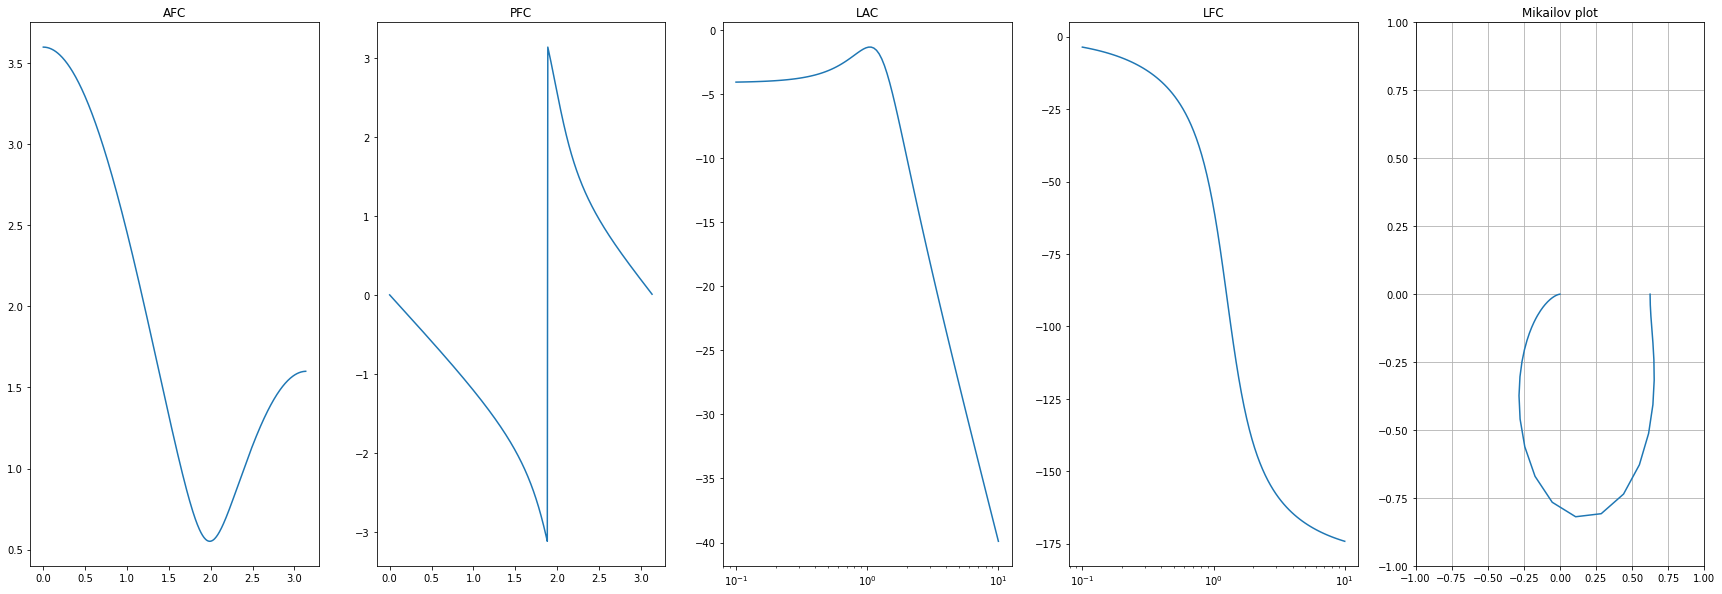

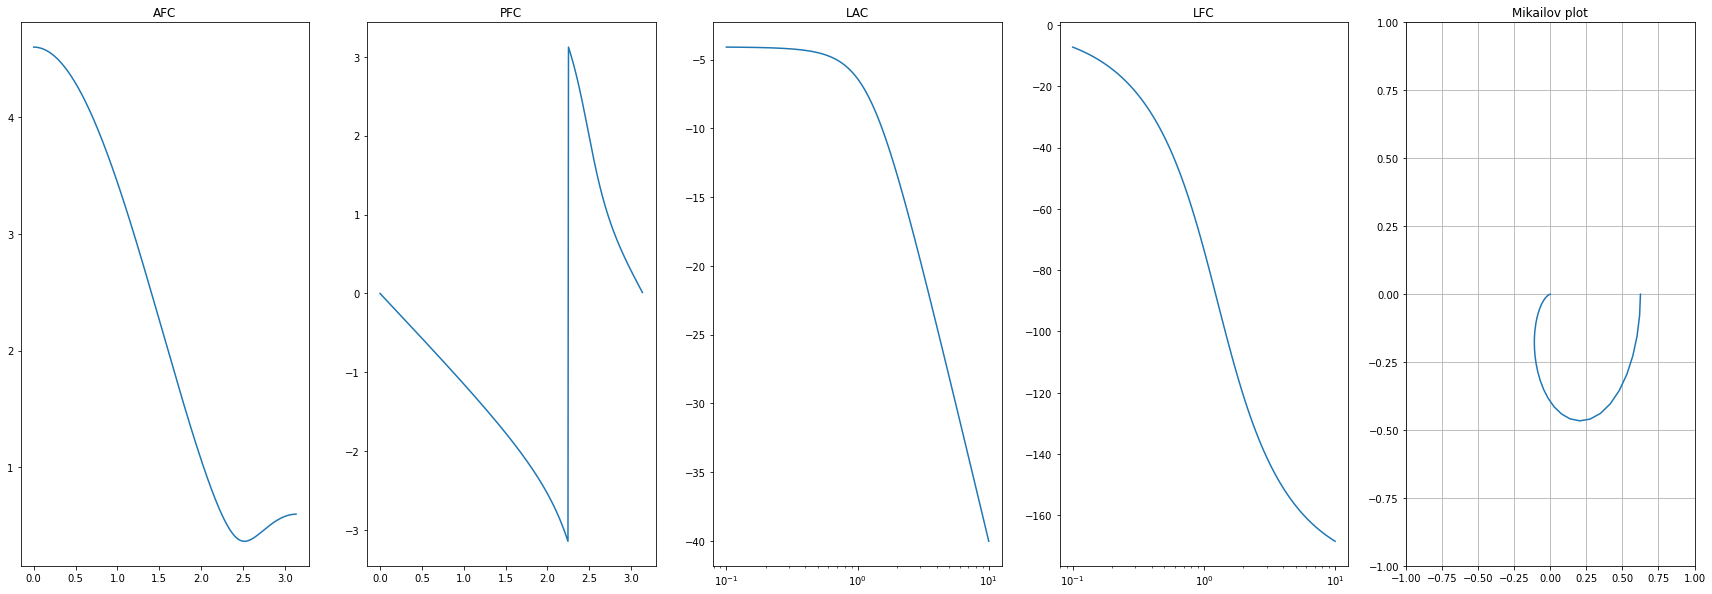

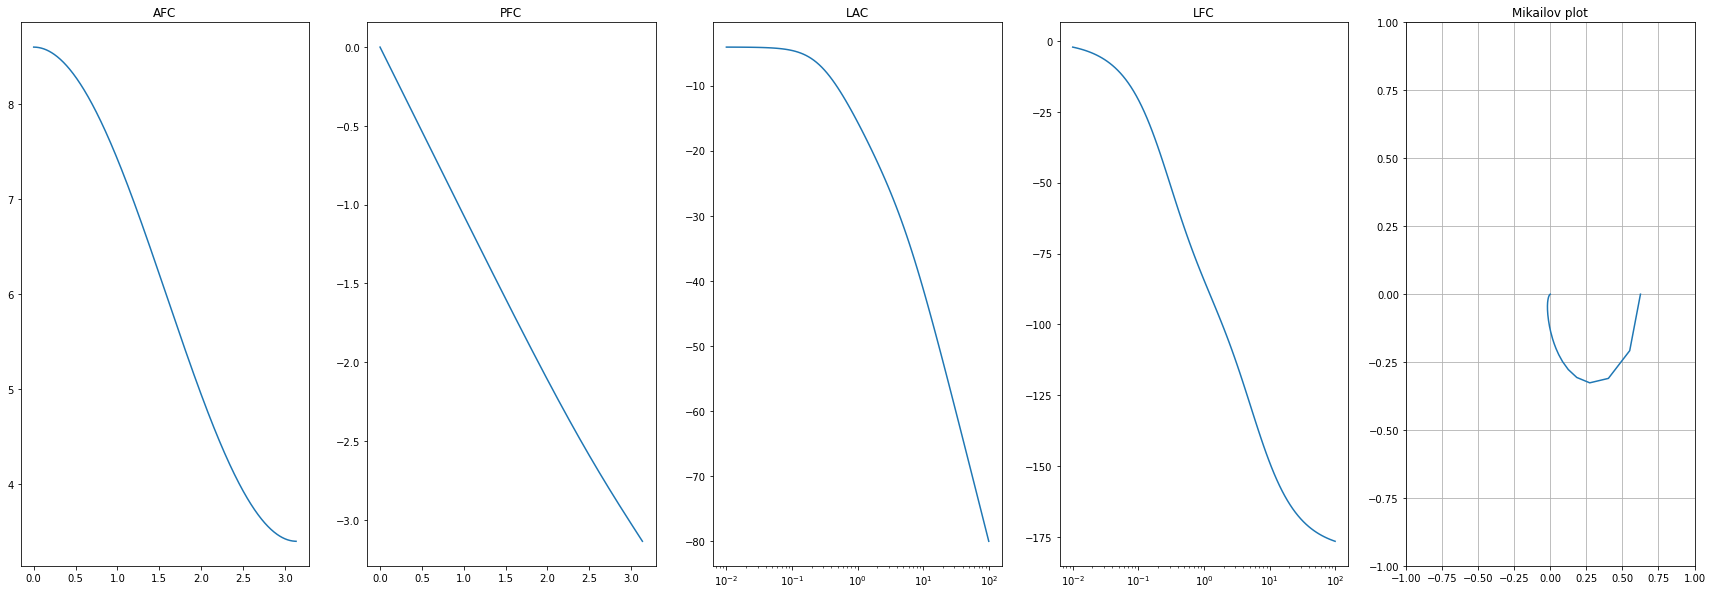

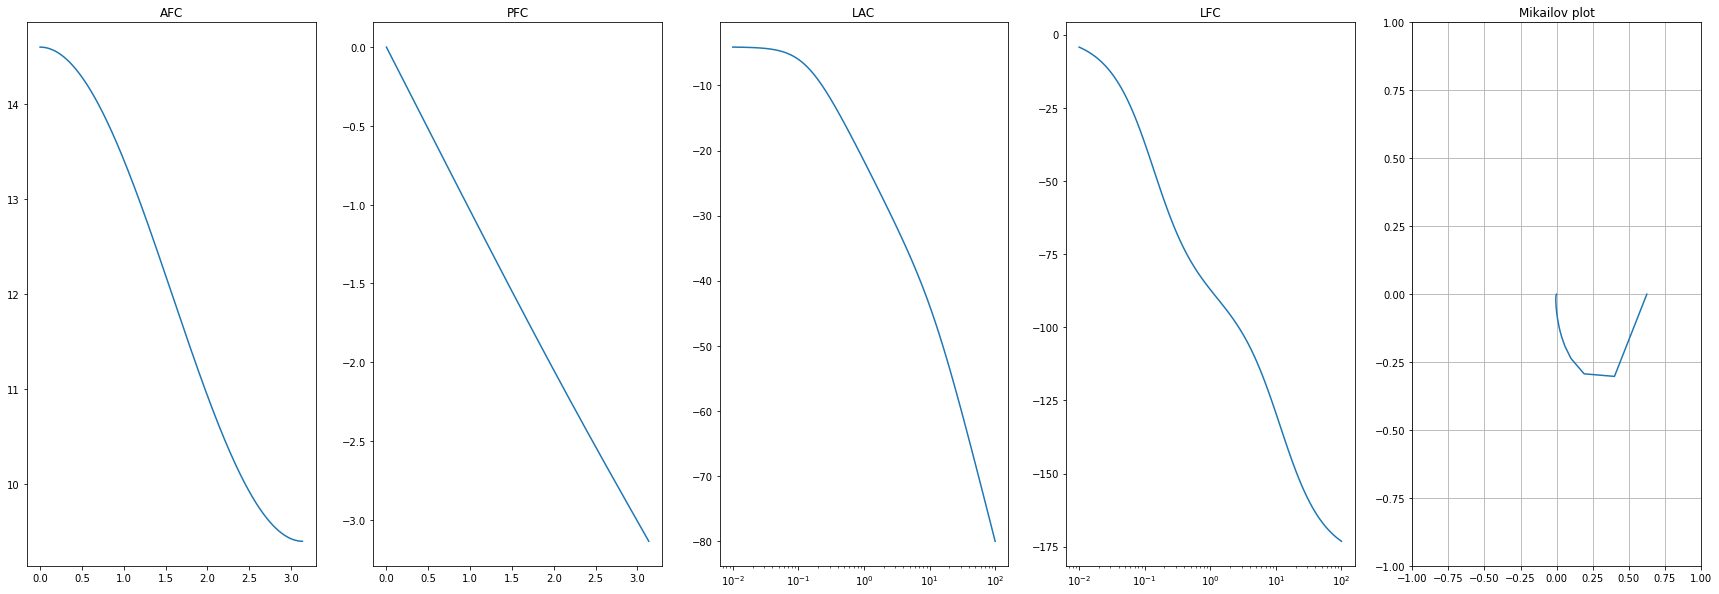

In [3]:
kappas = [0.5, 1.0, 3.0, 6.0]
omega_squared = 1.6

for kappa in kappas:
    print ("kappa = {}, omega^2 = {}".format(kappa, omega_squared))
    fig = plt.figure(figsize = (30, 10))
    gs = gridspec.GridSpec(1, 5)
    ax = []
    for i in range(5):
        ax.append(fig.add_subplot(gs[i])) 
    sys = TransferFunction([1], [1, 2 * kappa, omega_squared])
    W, mag, phase = bode(sys)
    w, h = freqz(a = [1], b = [1, 2 * kappa, omega_squared], plot = lambda w, h: ax[0].plot(w, np.abs(h)))
    ax[0].set_title("AFC")
    ax[1].plot(w, np.angle(h)); ax[1].set_title("PFC")
    ax[2].semilogx(W, mag); ax[2].set_title("LAC")
    ax[3].semilogx(W, phase); ax[3].set_title("LFC")
    Mikailov_plot(kappa, omega_squared, ax = ax[4])

